### Author: Kethavath Mohan Naik
### Profile: Data Science and Business Analytics  
### From: The Sparks Foundation #GRIPJUNE2022
### Email: kethavathmohannaik143@gmail.com
### Cell: 9398735397

### TASK 1: Prediction Using Supervised ML

#### Objective:

Predict the percentage of a student based on the no. of study hours. What will be the predicted score if a student studies for 9.25 hrs/ day?

##### About the task: 
This task is Supervised Machine Learning(ML) and such kind of learning includes the training of the model on a labelled dataset that includes both training and validation of datasets.
The Labelled dataset is one that has both input and output parameters.

### Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
This is a simple linear regression task as it involves just two variables

In [5]:
# Importing all essential libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Importing the dataset
data_Url = "http://bit.ly/w-data"
data = pd.read_csv(data_Url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Size of the dataset
data.shape

(25, 2)

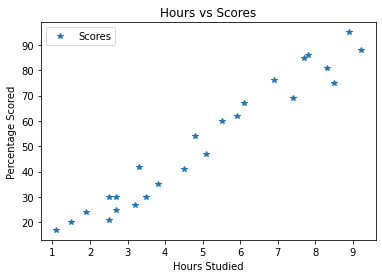

In [4]:
# Plotting and drawing insights from the data
data.plot(x="Hours",y="Scores",style="*")
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and score obtained.

### Preprocessing the data

##### Dividing the data into "attributes" (input) and "lables" (output)

In [5]:
x = data.iloc[:,:-1].values # independent variable 
y = data.iloc[:,1].values  # dependent variable

#### spliting the attributes and labels data into training and test sets using Scikit-Learn's built-in train_test_split() method:

In [6]:
#spliting the data into traning and testing the set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

### Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [7]:
# training the algorithm
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor=regressor.fit(x_train,y_train)

### Making Predictions

In [8]:
# Predicting the scores
y_predict=regressor.predict(x_test)
y_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [9]:
# Comparing Actual vs Predicted
my_dict={'Actual': y_test, 
         'Predicted':y_predict
        }
df = pd.DataFrame(my_dict)  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [10]:
#Testing for the given data
hours = 9.25
predict = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(predict[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535



##### Score obtained by the student if he studies for 9.25 hours per day = 93.69173248737535

### Visualizing the data

Text(0, 0.5, 'Percentage Scored')

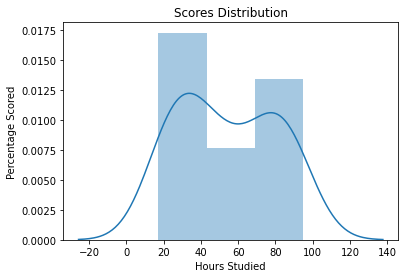

In [11]:
# Visualizing the y_train data using distplot
sns.distplot(y_train, kde=True)
plt.title('Scores Distribution')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')

Text(0, 0.5, 'Percentage Scored')

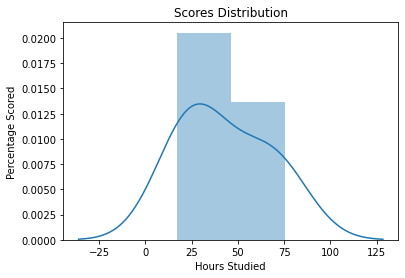

In [12]:
# Visualizing the y_predicted data using distplot
sns.distplot(y_predict, kde=True)
plt.title('Scores Distribution')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')

Text(0, 0.5, 'Percentage Scored')

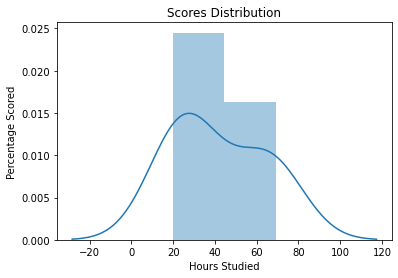

In [13]:
# Visualizing the y_test data using distplot
sns.distplot(y_test, kde=True)
plt.title('Scores Distribution')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')

Text(0, 0.5, 'Percentage Scored')

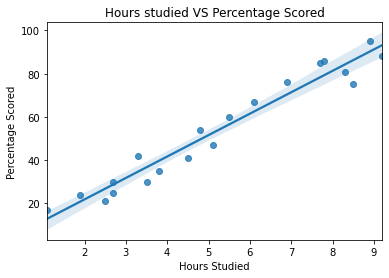

In [14]:
# Visualizing the training data using regplot
sns.regplot(x_train, y_train)
plt.title('Hours studied VS Percentage Scored')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')

#### Visualizing the training data

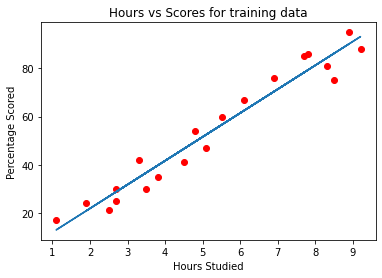

In [15]:
# visualizing the data for training set
plt.scatter(x_train,y_train,color="r")
plt.plot(x_train,regressor.predict(x_train))
plt.title('Hours vs Scores for training data')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

#### Visualizing the testing data

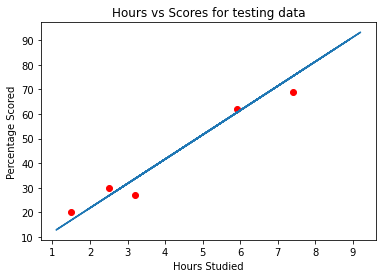

In [16]:
# visualizing the data for training set
plt.scatter(x_test,y_test,color="r")
plt.plot(x_train,regressor.predict(x_train))
plt.title('Hours vs Scores for testing data')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

### Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [17]:
# for calculating the Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE)
from sklearn import metrics
print("MAE=",metrics.mean_absolute_error(y_test,y_predict))
print("MSE=",metrics.mean_squared_error(y_test,y_predict))
print("RMSE=",np.sqrt(metrics.mean_absolute_error(y_test,y_predict)))

MAE= 4.183859899002975
MSE= 21.598769307217406
RMSE= 2.0454485813637495


In [18]:
# For r_score calculation
from sklearn import metrics
print(metrics.r2_score(y_predict,y_test))

0.9546785947197246


##### r_score is correlation coefficient in the regression it is always less than 1  if r2_score>>>0.70 our model is optimum and good 

In [19]:
# Calculating the slope and intercept of the regression line
# y=mx+c
print("c=",regressor.intercept_) # intercept of the line
print("m=",regressor.coef_)  # slope of the line

c= 2.0181600414346974
m= [9.91065648]
